## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_result=pd.merge(study_results,mouse_metadata,on='Mouse ID')

# Display the data table for preview
study_result.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice=study_result["Mouse ID"].unique()
mice_count=len(mice)
mice_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice=study_result.loc[study_result.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
duplicate_mice
 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=pd.DataFrame(duplicate_mice)
duplicate_mouse_id



,0
0,g989


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe=study_result[study_result['Mouse ID'].isin(duplicate_mice)==False]

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_dataframe["Mouse ID"].value_counts()
clean_number_of_mouse=len(clean_mice)
clean_number_of_mouse

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df=study_result.groupby('Drug Regimen')

# Assemble the resulting series into a single summary dataframe.


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean=summary_df['Tumor Volume (mm3)'].mean()
tumor_median=summary_df['Tumor Volume (mm3)'].median()
tumor_stdev=summary_df['Tumor Volume (mm3)'].std()
tumor_sem=summary_df['Tumor Volume (mm3)'].sem()

# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_df=pd.DataFrame({'Mean':tumor_mean,'Median':tumor_median,'Standard Deviation':tumor_stdev,'SEM':tumor_sem})
summary_stat_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


## Bar and Pie Charts

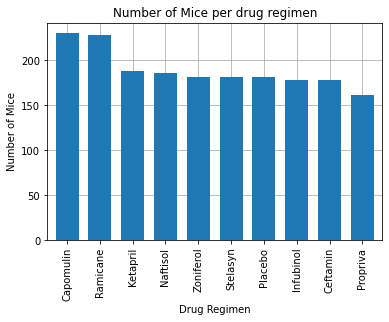

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot=study_result['Drug Regimen'].value_counts().plot.bar(width=0.7,zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice")
bar_plot.set_title('Number of Mice per drug regimen')
bar_plot.grid(zorder=0)


<function matplotlib.pyplot.show(close=None, block=None)>

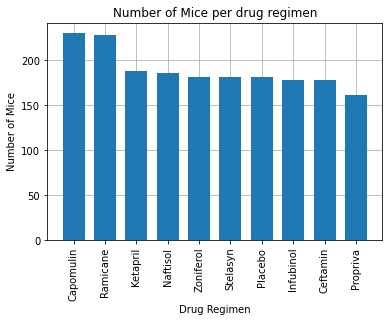

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
counts = study_result['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width = 0.7, zorder=3)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title('Number of Mice per drug regimen')
plt.grid(zorder=0)
plt.show


Text(0, 0.5, '')

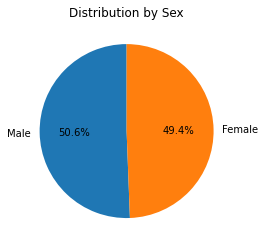

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_data = study_result['Sex'].value_counts()
pie_plot = pie_data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')
pie_plot.set_ylabel('')

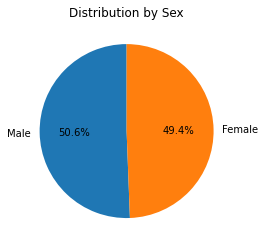

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = study_result['Sex'].value_counts()
plt.pie(pie_data, labels=pie_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df =study_result.loc[study_result["Drug Regimen"] == "Capomulin",:]
Ramicane_df =study_result.loc[study_result["Drug Regimen"] == "Ramicane", :]
Infubinol_df =study_result.loc[study_result["Drug Regimen"] == "Infubinol", :]
Ceftamin_df =study_result.loc[study_result["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol,study_result, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
